# Importing Reqirments. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pint
import os
import pandas as pd

Unit Regestery for following units propperly using pint 

In [3]:
unit = pint.UnitRegistry()

# RAW DATA 

In [4]:

# ! < mA> then calculate the V using V = IR where R is the index of I represented in K ohm
TABLE_2_3 = np.array([ 0.165, 0.138, 0.121, 0.105, 0.095, 0.087, 0.080, 0.074, 0.069, 0.065]) * unit.milliampere

# ! <mA, K ohm (from graph)>
TABLE_2_4 = np.array([
    [0.089, 5.6], # R1
    [0.119, 3.2], # R2  
    [0.074, 7.8], # Rs
    [0.129, 2.5]  # Rp
]) * np.array([unit.milliampere, unit.kiloohm])
TABLE_2_3

Magnitude,[0.165 0.138 0.121 0.105 0.095 0.087 0.08 0.074 0.069 0.065]
Units,milliampere


In [36]:
Calculated_TABLE_2_3 = []

for r, i in enumerate(TABLE_2_3):
    r = (r+1) * unit.kiloohm
    item = (r, i, (i*r).to(unit.volt))
    Calculated_TABLE_2_3.append(item)

Calculated_TABLE_2_4 = []
for index, (i,r) in enumerate(TABLE_2_4):
     
    item = (index, i, r)
    Calculated_TABLE_2_4.append(item)


Calculated_TABLE_2_3 = np.array(Calculated_TABLE_2_3, dtype=object)

Calculated_TABLE_2_4 = np.array(Calculated_TABLE_2_4, dtype=object)

In [37]:

# Calculated Data:
Calculated_TABLE_2_3

array([[<Quantity(1, 'kiloohm')>, <Quantity(0.165, 'milliampere')>,
        <Quantity(0.165, 'volt')>],
       [<Quantity(2, 'kiloohm')>, <Quantity(0.138, 'milliampere')>,
        <Quantity(0.276, 'volt')>],
       [<Quantity(3, 'kiloohm')>, <Quantity(0.121, 'milliampere')>,
        <Quantity(0.363, 'volt')>],
       [<Quantity(4, 'kiloohm')>, <Quantity(0.105, 'milliampere')>,
        <Quantity(0.42, 'volt')>],
       [<Quantity(5, 'kiloohm')>, <Quantity(0.095, 'milliampere')>,
        <Quantity(0.475, 'volt')>],
       [<Quantity(6, 'kiloohm')>, <Quantity(0.087, 'milliampere')>,
        <Quantity(0.522, 'volt')>],
       [<Quantity(7, 'kiloohm')>, <Quantity(0.08, 'milliampere')>,
        <Quantity(0.56, 'volt')>],
       [<Quantity(8, 'kiloohm')>, <Quantity(0.074, 'milliampere')>,
        <Quantity(0.592, 'volt')>],
       [<Quantity(9, 'kiloohm')>, <Quantity(0.069, 'milliampere')>,
        <Quantity(0.621, 'volt')>],
       [<Quantity(10, 'kiloohm')>, <Quantity(0.065, 'milliampere')>

# Creating Raw DataFrame

after creating dataframes turn them to latex

In [134]:


df_table_2_3 = pd.DataFrame(Calculated_TABLE_2_3, columns=['Resistor (K$/Omega$)', 'Current (mA)', 'Voltage (V)'])
df_table_2_4 = pd.DataFrame(TABLE_2_4, columns=['Current (mA)', 'Resistor (K$/Omega$)'])

df_table_2_3.to_latex('Table_2_3.tex', index=False, float_format="%.2f")
df_table_2_4.to_latex('Table_2_4.tex', index=False, float_format="%.2f")
"""df_table_3_5.to_latex('Table_3_5.tex', index=False, float_format="%.2f")
"""

print("LaTeX files saved successfully!")

LaTeX files saved successfully!


In [39]:
df_table_2_3

,Resistor (K$/Omega$),Current (mA),Voltage (V)
0,1 kiloohm,0.165 milliampere,0.165 volt
1,2 kiloohm,0.138 milliampere,0.276 volt
2,3 kiloohm,0.121 milliampere,0.363 volt
3,4 kiloohm,0.105 milliampere,0.42 volt
4,5 kiloohm,0.095 milliampere,0.475 volt
5,6 kiloohm,0.087 milliampere,0.522 volt
6,7 kiloohm,0.08 milliampere,0.56 volt
7,8 kiloohm,0.074 milliampere,0.592 volt
8,9 kiloohm,0.069 milliampere,0.621 volt
9,10 kiloohm,0.065 milliampere,0.65 volt


In [40]:
Data = {
    "$I(R)$": df_table_2_3,
    "$V(I)$": df_table_2_4,
     
}
for table_name, table_data in Data.items():
    print(f"\n{table_name}:")
    for row in table_data:
        print(row)


$I(R)$:
Resistor (K$/Omega$)
Current (mA)
Voltage (V)

$V(I)$:
Current (mA)
Resistor (K$/Omega$)


In [41]:
print(type(df_table_2_3["Current (mA)"].iloc[0]))


<class 'pint.Quantity'>


In [42]:

# Specify the directory to save the PNG files
output_directory = "output_plots/"  # Specify your output directory
if not os.path.exists(output_directory):
    os.makedirs(output_directory)  # Ensure this directory exists or create it


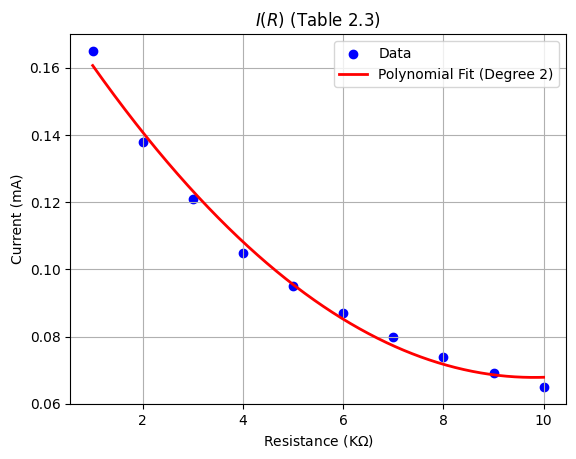

In [62]:

# Assuming df_table_2_3 is already defined in your notebook
# I_2_3 and R_2_3 are defined as:
I_2_3 = np.array([i.magnitude for i in df_table_2_3["Current (mA)"]])  # Extracting current values
R_2_3 = np.array([i.magnitude for i in df_table_2_3["Resistor (K$/Omega$)"]])  # Extracting resistance values

# Create the scatter plot
R_2_3_reshaped = R_2_3.reshape(-1, 1)

# Create polynomial features (choose degree, e.g., 2 for quadratic)
degree =2  # Start with degree 1 for linear fit
poly_features = PolynomialFeatures(degree=degree)
R_poly = poly_features.fit_transform(R_2_3_reshaped)

# Fit linear regression model to the polynomial features
model_I = LinearRegression()
model_I.fit(R_poly, I_2_3)

R_linspace = np.linspace(min(R_2_3), max(R_2_3), 1000) 
R_linspace_poly = poly_features.transform(R_linspace.reshape(-1, 1)) 

I_pred = model_I.predict(R_linspace_poly)

# Create the scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(R_2_3, I_2_3, color='blue', marker='o', label='Data')

# Plot the regression line
plt.plot(R_linspace, I_pred, color='red', label=f'Polynomial Fit (Degree {degree})', linewidth=2)

# Adding titles and labels
plt.title('$I(R)$ (Table 2.3)')
plt.xlabel('Resistance (K$\Omega$)')
plt.ylabel('Current (mA)')
plt.grid(True)



# Add the legend
plt.legend()

predict_voltage_from_kiloohm = lambda R: model_I.predict(poly_features.fit_transform(np.array([[R]]))) * R

# Save the plot as a PNG file
plt.savefig(os.path.join(output_directory, 'current_vs_resistance_table_2_3.png'))
# Show the plot
plt.show()
plt.close()  # Close the plot to avoid display if running in a notebook

# ____


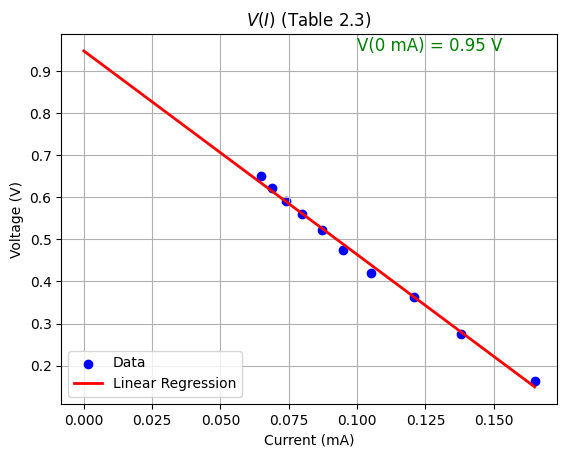

In [60]:
# Assuming df_table_2_3 is already defined in your notebook
I_2_3 = np.array([i.magnitude for i in df_table_2_3["Current (mA)"]])  # Extracting current values
V_2_3 = np.array([i.magnitude for i in df_table_2_3["Voltage (V)"]])  # Extracting voltage values

# Create the scatter plot
I_2_3_reshaped = I_2_3.reshape(-1, 1)

# Create polynomial features (choose degree, e.g., 1 for linear)
degree = 1  # Start with degree 1 for linear fit
poly_features = PolynomialFeatures(degree=degree)
I_poly = poly_features.fit_transform(I_2_3_reshaped)

# Fit linear regression model to the polynomial features
model = LinearRegression()
model.fit(I_poly, V_2_3)  # Fit using I_poly as features and V_2_3 as target

# Generate values for prediction
I_linspace = np.linspace(0, max(I_2_3), 1000)  # Use min and max of I_2_3 for a better range
I_linspace_poly = poly_features.transform(I_linspace.reshape(-1, 1))  # Transform for predictions

# Predict values using the model
V_pred = model.predict(I_linspace_poly)

# Predict V when I = 0
V_at_zero = model.predict(poly_features.transform(np.array([[0]])))  # Transform 0 mA and predict

# Create the scatter plot
#plt.figure(figsize=(10, 6))
plt.scatter(I_2_3, V_2_3, color='blue', marker='o', label='Data')

# Plot the regression line
plt.plot(I_linspace, V_pred, color='red', label='Linear Regression', linewidth=2)

# Adding titles and labels
plt.title('$V(I)$ (Table 2.3)')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.grid(True)

# Add the predicted voltage text on the figure
plt.text(0.1, V_at_zero[0], f'V(0 mA) = {V_at_zero[0]:.2f} V', 
         fontsize=12, color='green', ha='left')

# Add the legend
plt.legend()

plt.savefig(os.path.join(output_directory, 'Voltage_vs_current_table_2_3.png'))

# Show the plot
plt.show()
plt.close()  # Close the plot to avoid display if running in a notebook

# $ R_1 = 0.089 \\ R_2 = 0.119 \\ R_s = 0.074 (Series) \\ R_p = 0.129 (Parallel) $

In [130]:
R_1 = 5.6 * unit.kiloohm
R_2 = 3.2 * unit.kiloohm 
R_s = 7.8 * unit.kiloohm # (Series)
R_p = 2.5 * unit.kiloohm # (Parallel)

R_s_Formula = R_1 + R_2
R_p_Formula = (R_1*R_2)/(R_1 + R_2)

print(f"Given Resistances: R_1 = {R_1} ohms, R_2 = {R_2} ohms\n")

print("Series Resistance (R_s) Formula: R_s = R_1 + R_2")
print(f"R_s = {R_1} + {R_2} = {R_s_Formula:.3f} ohms\n")

print("Parallel Resistance (R_p) Formula: R_p = (R_1 * R_2) / (R_1 + R_2)")
print(f"R_p = ({R_1} * {R_2}) / ({R_1} + {R_2}) = {R_p_Formula:.3f} ohms\n")

Given Resistances: R_1 = 5.6 kiloohm ohms, R_2 = 3.2 kiloohm ohms

Series Resistance (R_s) Formula: R_s = R_1 + R_2
R_s = 5.6 kiloohm + 3.2 kiloohm = 8.800 kiloohm ohms

Parallel Resistance (R_p) Formula: R_p = (R_1 * R_2) / (R_1 + R_2)
R_p = (5.6 kiloohm * 3.2 kiloohm) / (5.6 kiloohm + 3.2 kiloohm) = 2.036 kiloohm ohms



# By Color Code
<div>
<img src="IMAGES/ColorCode.png" width="250"/>

<img src="IMAGES/Used_Resistors.jpg" width="550"/>
</div>

## $R_1$ : Yellow, Blue, Red and Silver
## $R_2$: Red, Red, Red and Silver

In [132]:
# Color code for Resistor R1: Yellow, Blue, Red, Silver
R1_color_code = [4, 6, 1e2, 1e-2]  # [First Digit, Second Digit, Multiplier, Tolerance]

# Color code for Resistor R2: Red, Red, Red, Silver
R2_color_code = [2, 2, 1e2, 1e-2]  # [First Digit, Second Digit, Multiplier, Tolerance]

# Calculate resistance for R1
R1_value = (R1_color_code[0] * 10 + R1_color_code[1]) * R1_color_code[2]
R1_tolerance = R1_value * R1_color_code[3]
R1_min = R1_value - R1_tolerance
R1_max = R1_value + R1_tolerance

# Calculate resistance for R2
R2_value = (R2_color_code[0] * 10 + R2_color_code[1]) * R2_color_code[2]
R2_tolerance = R2_value * R2_color_code[3]
R2_min = R2_value - R2_tolerance
R2_max = R2_value + R2_tolerance

# Print results nicely
print(f"Resistor R1: {R1_value / 1000:.2f} kΩ ± {R1_color_code[3] * 100}%")
print(f"  Minimum: {R1_min / 1000:.2f} kΩ, Maximum: {R1_max / 1000:.2f} kΩ")

print(f"Resistor R2: {R2_value / 1000:.2f} kΩ ± {R2_color_code[3] * 100}%")
print(f"  Minimum: {R2_min / 1000:.2f} kΩ, Maximum: {R2_max / 1000:.2f} kΩ")


Resistor R1: 4.60 kΩ ± 1.0%
  Minimum: 4.55 kΩ, Maximum: 4.65 kΩ
Resistor R2: 2.20 kΩ ± 1.0%
  Minimum: 2.18 kΩ, Maximum: 2.22 kΩ


# $$R_{i} = \frac{\Epsilon - V_x}{I_x}$$ 
Where $R_i$ is the internal Resistance and $V_x$ is a voltage value for a $I_x$ current for an $\Epsilon$ emf battary. 

In [82]:

R_example = 2 # k ohm
I_example = model_I.predict(poly_features.fit_transform(np.array([[R_example]]))) * unit.milliampere
V_example = predict_voltage_from_kiloohm(R_example) * unit.millivolt
R_example = R_example * unit.kiloohm
print(f"R = {R_example.to(unit.ohm)}, I = {I_example.to(unit.ampere)} V = {V_example.to(unit.volt)}" )

R = 2000.0 ohm, I = [0.000140769696969697] ampere V = [0.000281539393939394] volt


In [83]:
epsilon = V_at_zero[0] * unit.volts
print("Epsilon: ",epsilon)
R_i = (( epsilon- (V_example.to(unit.volts)))/(I_example.to(unit.ampere))).to(unit.ohm) 
R_i



Epsilon:  0.9472248277012586 volt


Magnitude,[6726.897256240911]
Units,ohm


# Thermistor

In [124]:
T_TABLE_2_5 = np.array([24] + list(range(30, 90, 5))) * unit.celsius
V = 1.5 * unit.volts
I_TABLE_2_5 = np.array([2.01, 2.25, 2.45, 2.72, 3.03, 3.31, 3.64, 4.0, 4.4, 4.77, 5.20, 5.58, 5.88]) * unit.milliampere
R_TABLE_2_5 = (V/ (I_TABLE_2_5)).to(unit.ohm)

In [125]:
print(I_TABLE_2_5, len(I_TABLE_2_5))
print(T_TABLE_2_5, len(T_TABLE_2_5))

[2.01 2.25 2.45 2.72 3.03 3.31 3.64 4.0 4.4 4.77 5.2 5.58 5.88] milliampere 13
[24 30 35 40 45 50 55 60 65 70 75 80 85] degree_Celsius 13


c:\Users\Pc\Drive’ım (ibrahim.hamed2701@gmail.com)\Academic Archive\Istanbul University\Cource Contents\Physics\Physics Electric Lab\venv\Lib\site-packages\sklearn\utils\_array_api.py:745: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\Pc\Drive’ım (ibrahim.hamed2701@gmail.com)\Academic Archive\Istanbul University\Cource Contents\Physics\Physics Electric Lab\venv\Lib\site-packages\sklearn\utils\_array_api.py:745: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\Users\Pc\Drive’ım (ibrahim.hamed2701@gmail.com)\Academic Archive\Istanbul University\Cource Contents\Physics\Physics Electric Lab\venv\Lib\site-packages\sklearn\utils\_array_api.py:745: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
c

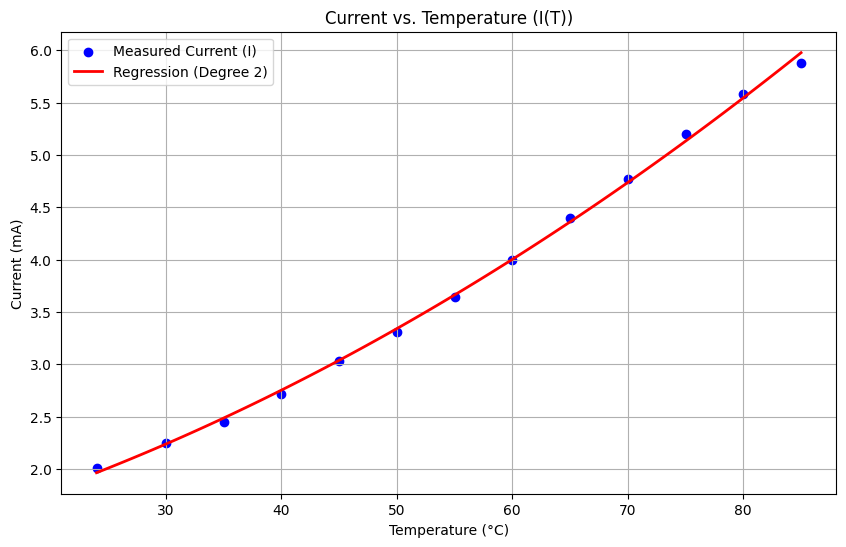

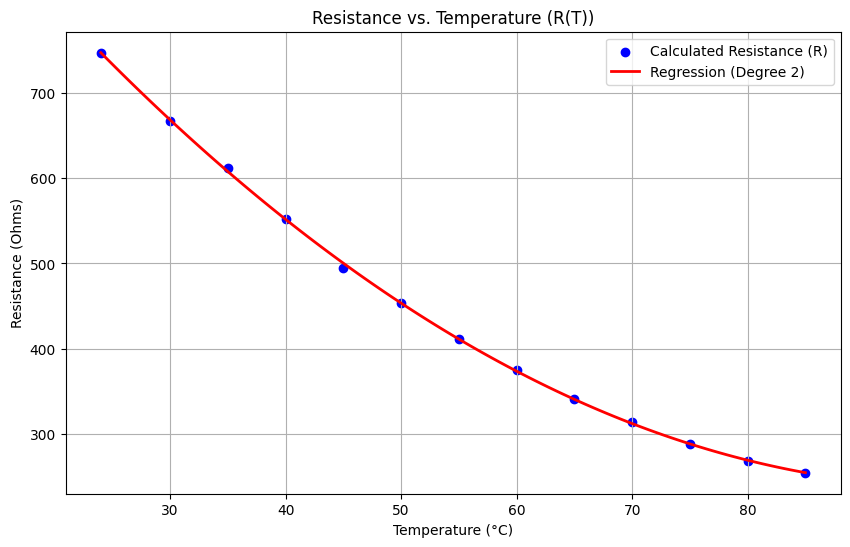

In [127]:

# Reshaping temperature for fitting
T_reshaped = T_TABLE_2_5.reshape(-1, 1)

# Polynomial regression degree
degree = 2  # Degree of polynomial regression (linear, quadratic, etc.)

# --- Regression for Current vs. Temperature ---
poly_features_I = PolynomialFeatures(degree=degree)
T_poly_I = poly_features_I.fit_transform(T_reshaped)

model_I = LinearRegression()
model_I.fit(T_poly_I, I_TABLE_2_5)

T_linspace = np.linspace(min(T_TABLE_2_5), max(T_TABLE_2_5), 100)
T_linspace_poly_I = poly_features_I.transform(T_linspace.reshape(-1, 1))
I_pred = model_I.predict(T_linspace_poly_I)

# --- Regression for Resistance vs. Temperature ---
poly_features_R = PolynomialFeatures(degree=degree)
T_poly_R = poly_features_R.fit_transform(T_reshaped)

model_R = LinearRegression()
model_R.fit(T_poly_R, R_TABLE_2_5)

T_linspace_poly_R = poly_features_R.transform(T_linspace.reshape(-1, 1))
R_pred = model_R.predict(T_linspace_poly_R)

# --- Plotting and saving I(T) ---
plt.figure(figsize=(10, 6))
plt.scatter(T_TABLE_2_5, I_TABLE_2_5, color='blue', marker='o', label='Measured Current (I)')
plt.plot(T_linspace, I_pred, color='red', label=f'Regression (Degree {degree})', linewidth=2)
plt.title('Current vs. Temperature (I(T))')
plt.xlabel('Temperature (°C)')
plt.ylabel('Current (mA)')
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(output_directory, 'Current_vs_Temperature.png'))
plt.show()

# --- Plotting and saving R(T) ---
plt.figure(figsize=(10, 6))
plt.scatter(T_TABLE_2_5, R_TABLE_2_5, color='blue', marker='o', label='Calculated Resistance (R)')
plt.plot(T_linspace, R_pred, color='red', label=f'Regression (Degree {degree})', linewidth=2)
plt.title('Resistance vs. Temperature (R(T))')
plt.xlabel('Temperature (°C)')
plt.ylabel('Resistance (Ohms)')
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(output_directory, 'Resistance_vs_Temperature.png'))
plt.show()